### 결정트리
* 특징
    - 데이터의 규칙학습을 통한 트리기반의 분류모델 
    - 데이터 균일도를 낮추는 방향(엔트로피가 낮아지는,지니계수가 낮아지는) 규칙 학습
* 용어
    - 루트노드: 시작점
    - 리프노드: 결정된 분류 말단 노드
    - 노드: 분류 클래스간의 연결
* 장점
    - 직관적
    - 파라미터 스케일링이 필요 없음
* 단점
    - 과적합에 빠지기 쉽다-> 테스트,시각화등으로 통해 과적합 여부 판단
* 파라미터
    - min_samples_split: 
        - 최소한의 샘플데이터수
        - 과적합 제어
    - min_samples_leaf: 
        - 말단노드가 되기위한 샘플 데이터수
        - 과적합 제어용및 비대칭 분류시 제어를 통해 변별력 높임
    - max_features
        - 최적 분할을 위해 고려될 피쳐수
    - max_depth:
        - 트리깊이
        - 과적합 제어에 유용
    - max_leaf_nodes: 리프노드 최대 갯수


    

In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### 머신러닝을 활용한 데이터 분석
# 정확도 정밀도 재현율
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
#ROC AUC 오차행렬
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,precision_recall_curve
# 데이터셋 분류: 트레인테스트셋분류,k-fold,s-kfold, gridsearchcv
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,GridSearchCV
# 분류모델 테스트
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
# 경고 무시 LogisticRegression solver 및 maxiter 문제 
import warnings
warnings.filterwarnings('ignore')

### 타이타닉
* Dataset
* columns
    - PassengerId: 승객ID*
    - Survived: 생존여부 1생존/0사망
    - class: 객실등급 
    - Name: 이름*
    - Sex:성별
    - Age:나이
    - SibSp: 형제자매 배우자수
    - Parch: 존비속 부모/자식
    - Ticket: 티켓번호*
    - Fare: 티켓요금
    - Cabin: 객실번호?
    - Embarked: 승선항

In [3]:
file='src/titanic.csv'
tdf=pd.read_csv(file)
tdf.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
##EDA
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
tdf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
tdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# 결측치및 불필요한 데이터 Cabin drop
# Age =0으로 대체
dtdf=tdf.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)
dtdf=dtdf.fillna(0)
dtdf.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
dtdf.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,0.0,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


In [9]:
dtdf['Embarked']=dtdf['Embarked'].astype('str')

In [10]:

#dtdf['']LabelEncoder().fit_transform()
dtdf['Sex']=LabelEncoder().fit_transform(dtdf['Sex'])
dtdf['Embarked']=LabelEncoder().fit_transform(dtdf['Embarked'])
dtdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [11]:
pd.melt(dtdf)

,variable,value
0,Survived,0.0
1,Survived,1.0
2,Survived,1.0
3,Survived,1.0
4,Survived,0.0
...,...,...
7123,Embarked,3.0
7124,Embarked,3.0
7125,Embarked,3.0
7126,Embarked,1.0


<AxesSubplot:xlabel='variable', ylabel='value'>

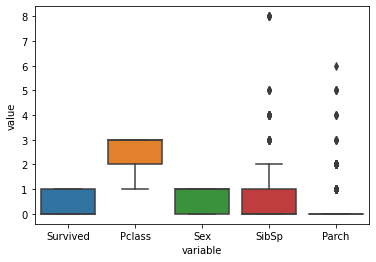

In [12]:
# 시각화 분석
# 데이터 편향도가 높음
boxdata=pd.melt(dtdf[['Survived','Pclass','Sex','SibSp','Parch']])
sns.boxplot(x='variable',y='value',data=boxdata)

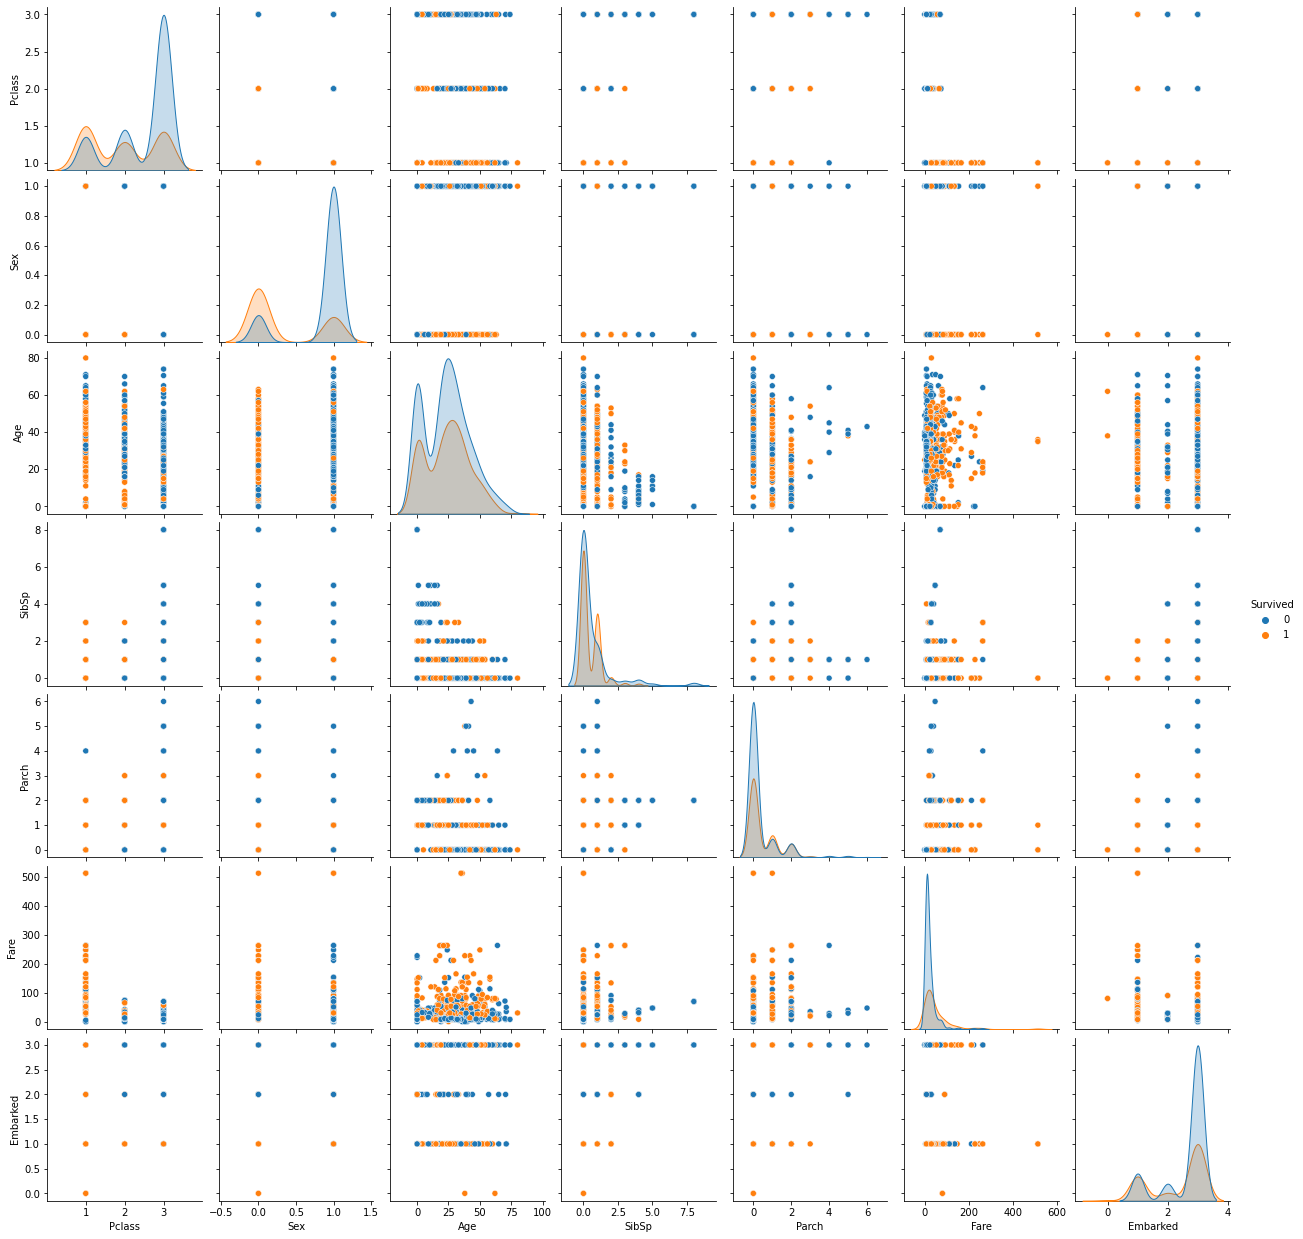

In [13]:
sns.pairplot(dtdf,hue='Survived')

In [14]:
# 데이터와 라벨 분리
X=dtdf.iloc[:,1:]
Y=dtdf.iloc[:,:1]
X_train,X_test,y_train,y_test=train_test_split(X,Y,random_state=123)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)


(668, 7) (668, 1) (223, 7) (223, 1)


In [15]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
acc=accuracy_score(pred,y_test)
racc=np.round(acc,4)
print('정확도:',racc)

정확도: 0.8206


In [16]:
fname=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [17]:
from sklearn.tree import export_graphviz
# 노드 파일화
ofile='src/titanic.dot'
export_graphviz(dt,out_file=ofile,
                class_names=['Die','Sruvived'],
                feature_names=fname,
                impurity=True,
                filled=True)

In [18]:
import graphviz
with open(ofile) as f:
    dot_graph=f.read()
a=graphviz.Source(dot_graph,format='png')
#객체명,이름,폴더
graphviz.Source.render(a,'titanic','img')

'img\\titanic.png'

In [19]:
# 중요도 분석
dtfi=dt.feature_importances_
dtfi

array([0.2271599 , 0.68562325, 0.01818604, 0.        , 0.01910678,
       0.04992403, 0.        ])

<AxesSubplot:>

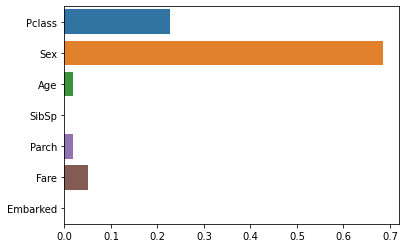

In [20]:
sns.barplot(x=dtfi,y=fname)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=123)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
acc=accuracy_score(pred,y_test)
racc=np.round(acc,4)
racc

0.8072

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=123)
gbc.fit(X_train,y_train)
pred=gbc.predict(X_test)
acc=accuracy_score(pred,y_test)
racc=np.round(acc,4)
racc

0.8296

In [23]:
import xgboost as xgb
from xgboost import XGBClassifier

In [24]:
xgbc=XGBClassifier( random_state=123)
xgbc.fit(X_train,y_train)
pred=xgbc.predict(X_test)
acc=accuracy_score(pred,y_test)
racc=np.round(acc,4)
racc

[11:04:43] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8475